In [194]:
import pandas as pd
import numpy as np
import glob
import Orange
from IPython.display import display, HTML

In [195]:
def FriedmanTest(df):
    
    n,k = df.shape
    
    rank_df = df.rank(axis=1,method='max',ascending=False)
    avg_rank_df=np.mean(rank_df,axis=0)
    
    # first compute average of ranks
    R_avg = sum((avg_rank_df*n))/(n*k)
    # then compute sum of squared distance w.r.t column ranks
    SSD_1 = n*sum((avg_rank_df - R_avg)**2)
    # then compute sum of squared distance w.r.t all ranks
    SSD_2 = sum(np.sum((rank_df - R_avg)**2))/(n*(k-1))
    # compute f-statistic measure
    f_stat = SSD_1/SSD_2
    return f_stat, avg_rank_df




METRIC: micro_acc %



model_name,DecisionTreeClassifier,GradientBoostingClassifier,KNeighborsClassifier,MLPClassifier,RandomForestClassifier,SVC
dataset,,,,,,
DrugConsumption_downsample_random,77.15 (6.0),78.42 (2.0),78.21 (3.0),77.89 (4.0),77.81 (5.0),78.66 (1.0)
DrugConsumption_nosample,77.2 (6.0),80.36 (3.0),80.12 (4.0),81.21 (2.0),79.43 (5.0),81.29 (1.0)
DrugConsumption_upsample_random,75.72 (6.0),79.59 (1.0),78.45 (4.0),77.95 (5.0),79.19 (3.0),79.19 (2.0)
HeartDisease_nosample,78.31 (6.0),78.97 (5.0),80.83 (4.0),82.49 (2.0),81.15 (3.0),83.32 (1.0)
Labour_nosample,77.67 (6.0),87.0 (5.0),89.33 (4.0),91.17 (2.0),91.17 (3.0),93.67 (1.0)


fstat (manual):  17.23
fstat (library):  FriedmanchisquareResult(statistic=17.228571428571428, pvalue=0.004086097575337763)
Critical Difference (manual):  3.37
Critical Difference (library):  3.3718164276595783


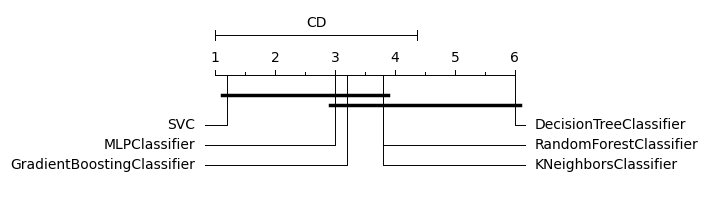


METRIC: macro_acc %



model_name,DecisionTreeClassifier,GradientBoostingClassifier,KNeighborsClassifier,MLPClassifier,RandomForestClassifier,SVC
dataset,,,,,,
DrugConsumption_downsample_random,78.12 (6.0),79.71 (2.0),79.68 (3.0),79.05 (4.0),78.94 (5.0),80.11 (1.0)
DrugConsumption_nosample,75.58 (6.0),77.06 (5.0),77.24 (4.0),78.44 (3.0),79.01 (1.0),78.6 (2.0)
DrugConsumption_upsample_random,76.53 (6.0),79.61 (2.0),79.4 (4.0),78.85 (5.0),79.6 (3.0),80.4 (1.0)
HeartDisease_nosample,78.05 (6.0),78.71 (5.0),80.54 (4.0),82.34 (2.0),80.74 (3.0),83.17 (1.0)
Labour_nosample,73.54 (6.0),85.42 (5.0),86.88 (4.0),90.0 (2.0),89.79 (3.0),91.88 (1.0)


fstat (manual):  17.23
fstat (library):  FriedmanchisquareResult(statistic=17.228571428571428, pvalue=0.004086097575337763)
Critical Difference (manual):  3.37
Critical Difference (library):  3.3718164276595783


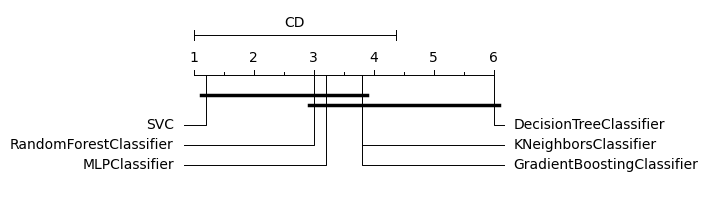


METRIC: g_mean %



model_name,DecisionTreeClassifier,GradientBoostingClassifier,KNeighborsClassifier,MLPClassifier,RandomForestClassifier,SVC
dataset,,,,,,
DrugConsumption_downsample_random,77.98 (6.0),79.55 (2.0),79.48 (3.0),78.91 (4.0),78.8 (5.0),79.93 (1.0)
DrugConsumption_nosample,75.05 (6.0),76.37 (5.0),76.71 (4.0),77.93 (3.0),78.87 (1.0),78.09 (2.0)
DrugConsumption_upsample_random,76.43 (6.0),79.56 (2.0),79.29 (4.0),78.72 (5.0),79.54 (3.0),80.26 (1.0)
HeartDisease_nosample,77.73 (6.0),78.23 (5.0),80.1 (4.0),81.88 (2.0),80.3 (3.0),82.83 (1.0)
Labour_nosample,61.72 (6.0),81.47 (5.0),82.61 (4.0),86.46 (2.0),86.21 (3.0),88.47 (1.0)


fstat (manual):  17.23
fstat (library):  FriedmanchisquareResult(statistic=17.228571428571428, pvalue=0.004086097575337763)
Critical Difference (manual):  3.37
Critical Difference (library):  3.3718164276595783


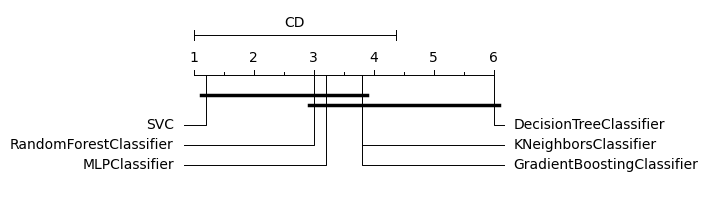

In [218]:
import warnings
from scipy import stats

warnings.filterwarnings('ignore')

# all datasets
path = {'DrugConsumption_nosample':'run_20221106-102731-repeated-k6-Cannabis-no-sampling/Cannabis_Dataset',
        'DrugConsumption_upsample_smote':'run_20221106-134917-repeated-k6-Cannabis-smote-upsampling/Cannabis_Dataset',
        'DrugConsumption_upsample_random':'run_20221107-122815-repeated-k6-Cannabis-random-oversample/Cannabis_Dataset',
        'DrugConsumption_downsample_random':'run_20221106-195730-repeated-k6-Cannabis-random-downsample/Cannabis_Dataset',
        'DrugConsumption_downsample_onesided':'run_20221108-084805-repeated-k6-Cannabis-onesided-downsample/Cannabis_Dataset',
        'HeartDisease_nosample':'run_20221107-090012-repeated-k14-HeartDisease-no-sampling/HeartDisease_Dataset',
        'Labour_nosample':'run_20221107-103706-repeated-k12-LabourDataset-no-sampling/Labour_Dataset'}

# specified 5 datasets
path = {'DrugConsumption_nosample':'run_20221106-102731-repeated-k6-Cannabis-no-sampling/Cannabis_Dataset',
        'DrugConsumption_upsample_random':'run_20221107-122815-repeated-k6-Cannabis-random-oversample/Cannabis_Dataset',
        'DrugConsumption_downsample_random':'run_20221106-195730-repeated-k6-Cannabis-random-downsample/Cannabis_Dataset',
        'HeartDisease_nosample':'run_20221107-090012-repeated-k14-HeartDisease-no-sampling/HeartDisease_Dataset',
        'Labour_nosample':'run_20221107-103706-repeated-k12-LabourDataset-no-sampling/Labour_Dataset'}

metrics = ['micro_acc','macro_acc','g_mean']

all_dfs = {}

for k, p in path.items():

    d1_csv = f'../output/{p}/BestModel_MetaData.csv'
    df1 = pd.read_csv(d1_csv)
    
    
    for metric in metrics:
        df_metric = df1.pivot(index='fold', columns='model_name', values=metric)


        metricm = df_metric.mean()
        df_metricm = metricm.to_frame().reset_index()
        df_metricm.columns = ['model_name',metric]
        df_metricm.rename(columns={0:'model_name',1:metric},inplace=True)
        df_metricm['dataset']=k

      
        if metric not in all_dfs:
            all_dfs[metric] = df_metricm
        else:
            all_dfs[metric] = pd.concat([all_dfs[metric],df_metricm],axis=0)
    
for metric in all_dfs:
    metric_df = all_dfs[metric]
    piv = metric_df.pivot(index='dataset',columns='model_name',values=metric)
    print(f"\nMETRIC: {metric} %\n")
    
    # get ranks and values next to each other
    rank_df = piv.rank(axis=1,method='max',ascending=False)
    piv_p = (piv*100).round(2)
    disp_df = piv_p.astype(str).add(' (').add(rank_df.astype(str)).add(')')
    display(HTML(disp_df.to_html()))
    fstat, avg_rank = FriedmanTest(piv)
    print('fstat (manual): ',round(fstat,2))
    df_l = piv.to_numpy()
    stat = stats.friedmanchisquare(*[df_l[:, col] for col in np.arange(df_l.shape[1])])
    print('fstat (library): ',stat)
    
    # Compute Critical Difference for Nemenyi post hoc testing
    n,k = piv.shape
    qalpha = 2.849705
    CD = qalpha*(math.sqrt(k*(k+1)/(6*n)))
    print('Critical Difference (manual): ',round(CD,2))
    
    CD_l = Orange.evaluation.compute_CD(avg_rank, n, alpha='0.05', test='nemenyi')
    print('Critical Difference (library): ',CD_l)
    
    Orange.evaluation.graph_ranks(avg_rank.values,avg_rank.index,cd=Critical_difference,width=5,textspace=1, filename=f'./{metric}_CD.png')
    plt.show()

# Obtain best HP for all the files

In [219]:
# Best hyper parameters for each fold
path = {'DrugConsumption_nosample':'run_20221106-102731-repeated-k6-Cannabis-no-sampling/Cannabis_Dataset',
        'DrugConsumption_upsample_smote':'run_20221106-134917-repeated-k6-Cannabis-smote-upsampling/Cannabis_Dataset',
        'DrugConsumption_upsample_random':'run_20221107-122815-repeated-k6-Cannabis-random-oversample/Cannabis_Dataset',
        'DrugConsumption_downsample_random':'run_20221106-195730-repeated-k6-Cannabis-random-downsample/Cannabis_Dataset',
        'DrugConsumption_downsample_onesided':'run_20221108-084805-repeated-k6-Cannabis-onesided-downsample/Cannabis_Dataset',
        'HeartDisease_nosample':'run_20221107-090012-repeated-k14-HeartDisease-no-sampling/HeartDisease_Dataset',
        'Labour_nosample':'run_20221107-103706-repeated-k12-LabourDataset-no-sampling/Labour_Dataset'}


In [232]:
for k, p in path.items():
    d1_csv = f'../output/{p}/BestModel_MetaData.csv'
    df1 = pd.read_csv(d1_csv)
    piv = df1.pivot(index='fold',columns='model_name',values='best_params') 
    piv.to_csv(f'{k}_best_hp.csv')